In [4]:
from sklearn.datasets import load_boston
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv(load_boston()['filename'], skiprows=1)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

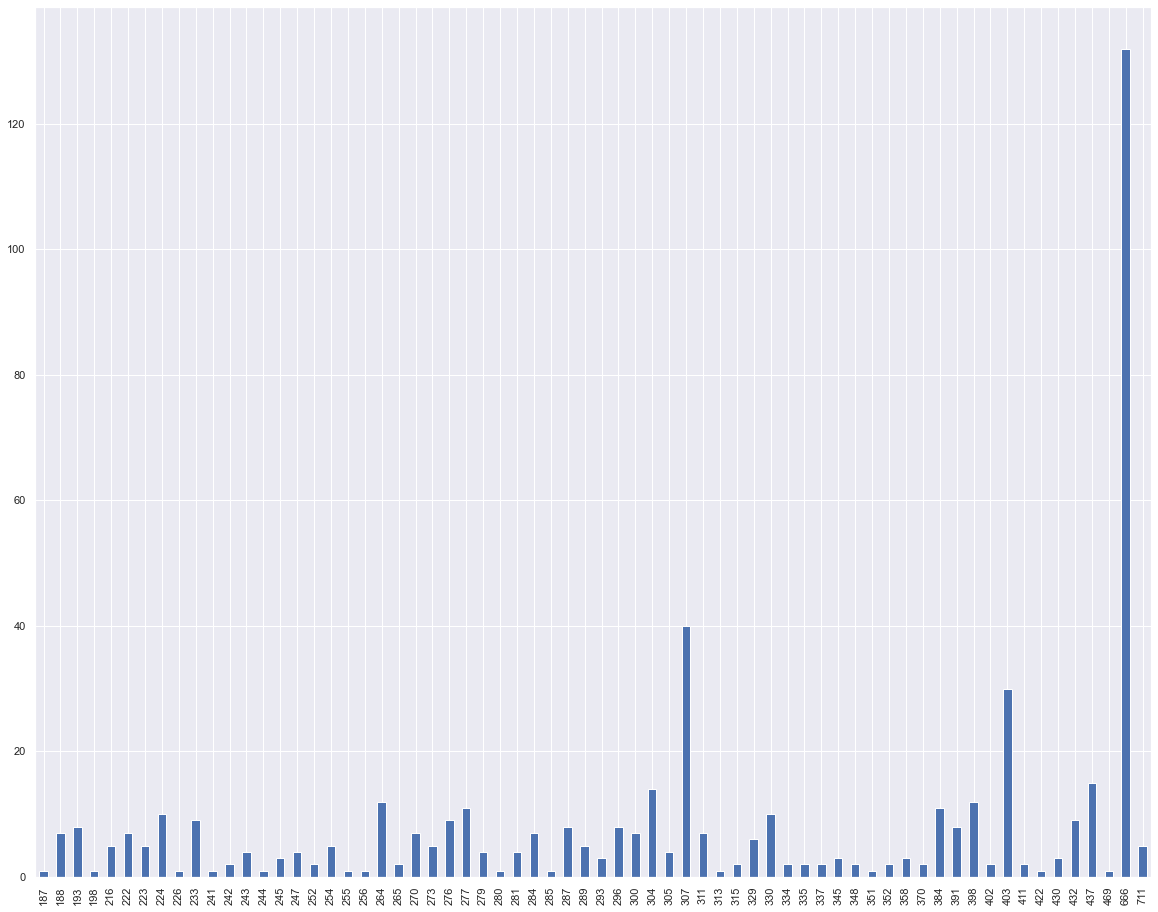

In [7]:
# смотрим выбросы по налогам (TAX)
sns.set(rc=({'figure.figsize':(20, 16)}))
data.TAX.value_counts().sort_index().plot(kind='bar')

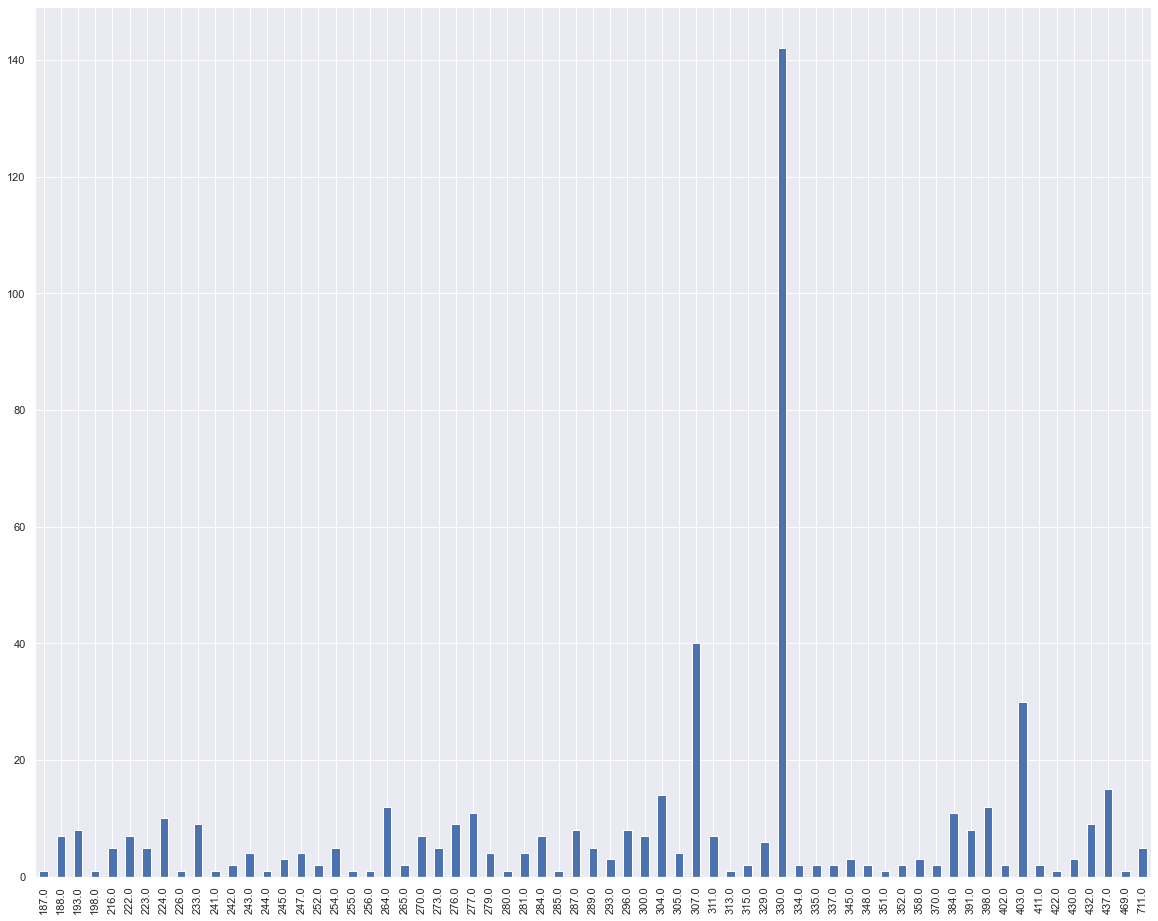

In [8]:
# 666 похоже на аномалию (хотя, если посмотреть на 307 или 403 - не факт). Но согласно замечаниям преподавателя -
# уберем ее методом приведения к медиане

data.loc[data['TAX'] == 666, 'TAX'] = data.TAX.median()
data.TAX.value_counts().sort_index().plot(kind='bar')

In [19]:
X = data.iloc[:,:13]
Y = data.iloc[:,13:]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [20]:
# строим модель по умолчанию, чтобы понять от какого результата двигаться

from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor().fit(X_train, y_train)
# print('Weights: {}'.format(reg.coef_))
# print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(X_test)
pred_values
print('Error, %: {}'.format(mean_absolute_error(pred_values, y_test)*100/data.MEDV.mean()))

Error, %: 12.49159044757391


In [25]:
# Экспериментальным путём выяснил, что после max_depth=7 ошибка снова начинает расти. 
# Оставим на 7 и попробуем поменять другие параметры
reg = DecisionTreeRegressor(max_depth=7).fit(X_train, y_train)
pred_values = reg.predict(X_test)
pred_values
print('Error, %: {}'.format(mean_absolute_error(pred_values, y_test)*100/data.MEDV.mean()))

Error, %: 9.52070117888166


In [74]:
# Экспериментальным путём выяснил, что после max_depth=7 ошибка снова начинает расти. 
# Оставим на 7 и попробуем поменять другие параметры
reg = DecisionTreeRegressor(max_depth=7, splitter='random').fit(X_train, y_train)
pred_values = reg.predict(X_test)
pred_values
print('Error, %: {}'.format(mean_absolute_error(pred_values, y_test)*100/data.MEDV.mean()))

Error, %: 12.464482153376368


[]

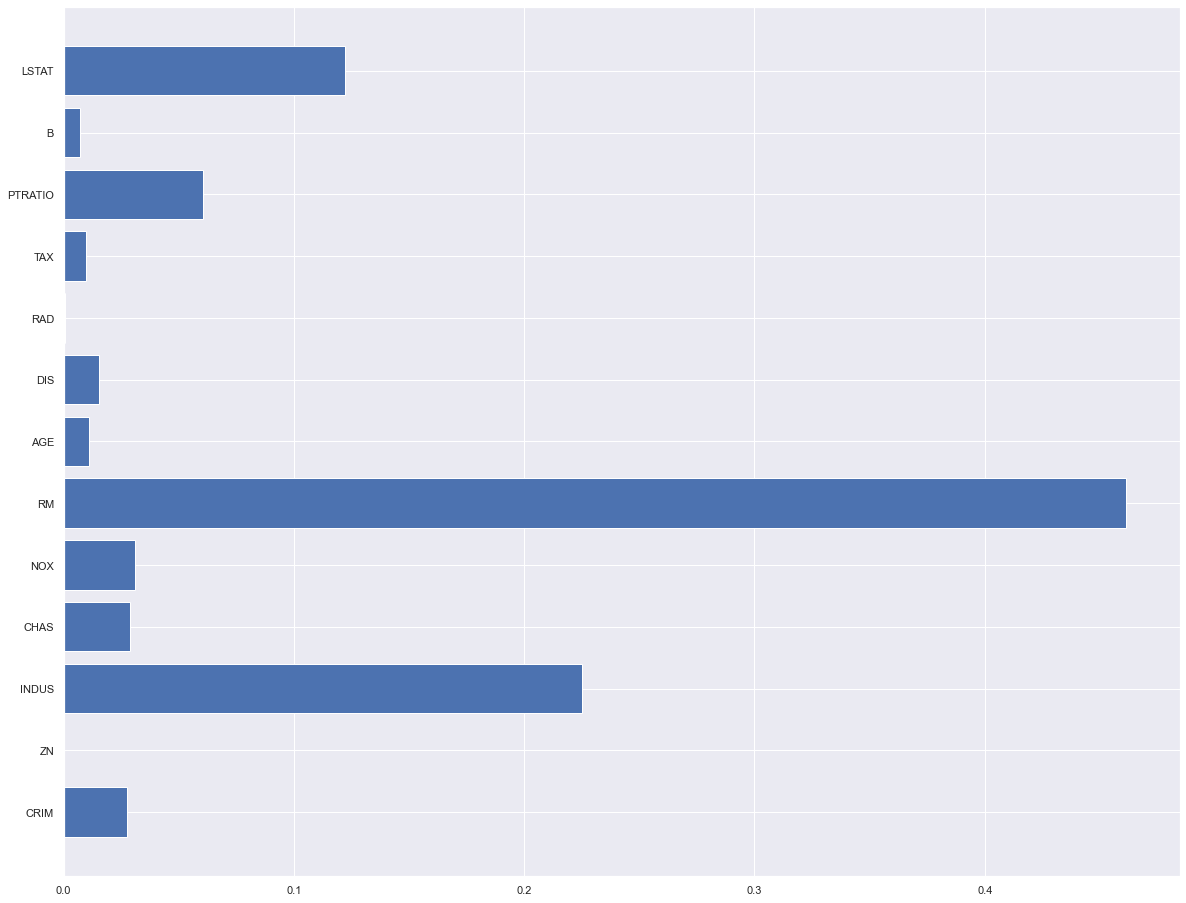

In [79]:
from matplotlib import pyplot as plt
import numpy as np
plt.barh(np.arange(len(reg.feature_importances_)), reg.feature_importances_)
plt.yticks(np.arange(len(X_train.columns)),X_train.columns)
plt.plot()

In [89]:
# попробуем сделать модель только на самых важных фичах

X_train2 = X_train[['LSTAT', 'INDUS', 'RM', 'PTRATIO']]
X_test2 = X_test[['LSTAT', 'INDUS', 'RM', 'PTRATIO']]

In [103]:
reg = DecisionTreeRegressor().fit(X_train2, y_train)
pred_values = reg.predict(X_test2)
pred_values
print('Error, %: {}'.format(mean_absolute_error(pred_values, y_test)*100/data.MEDV.mean()))

# видим качество хуже, чем у модели на полных данных

Error, %: 12.87882540049417
